In [27]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
file_path = "/content/Employee_Attrition.csv"
ds = pd.read_csv(file_path)
pd.options.display.max_columns = 500
ds

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


most of the data are categorical features; employee number is not that important for any employee to leave.

ALL THE CATEGORICAL FEATURES SHOULD BE ONE-HOT ENCODED BASICALLY MEANING ENCODING IT TO MAKE IT 0, 1, 2 ETC.



In [5]:
ds.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [6]:
ds.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
ds.JobRole.value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [8]:
#Binary: Attrition, Gender, Over18, OverTime
ds['Attrition'] = ds['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
ds['Gender'] = ds['Gender'].apply(lambda x:1 if x=='Male' else 0)
ds['Over18'] = ds['Over18'].apply(lambda x:1 if x=='Y' else 0)
ds['OverTime'] = ds['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
ds

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [9]:
# One-hot encoding : Business, Travel, Department, EducationField, JobRole, Marital Status

ds = ds.join(pd.get_dummies(ds['BusinessTravel'], prefix='BusinessTravel')).drop('BusinessTravel', axis=1)
ds = ds.join(pd.get_dummies(ds['Department'], prefix='Department')).drop('Department', axis=1)
ds = ds.join(pd.get_dummies(ds['EducationField'], prefix='Education')).drop('EducationField', axis=1)
ds = ds.join(pd.get_dummies(ds['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
ds = ds.join(pd.get_dummies(ds['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
ds

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [10]:
ds = ds.map(lambda x: 1 if x is True else 0 if x is False else x)
ds

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
ds = ds.drop('EmployeeNumber', axis = 1)

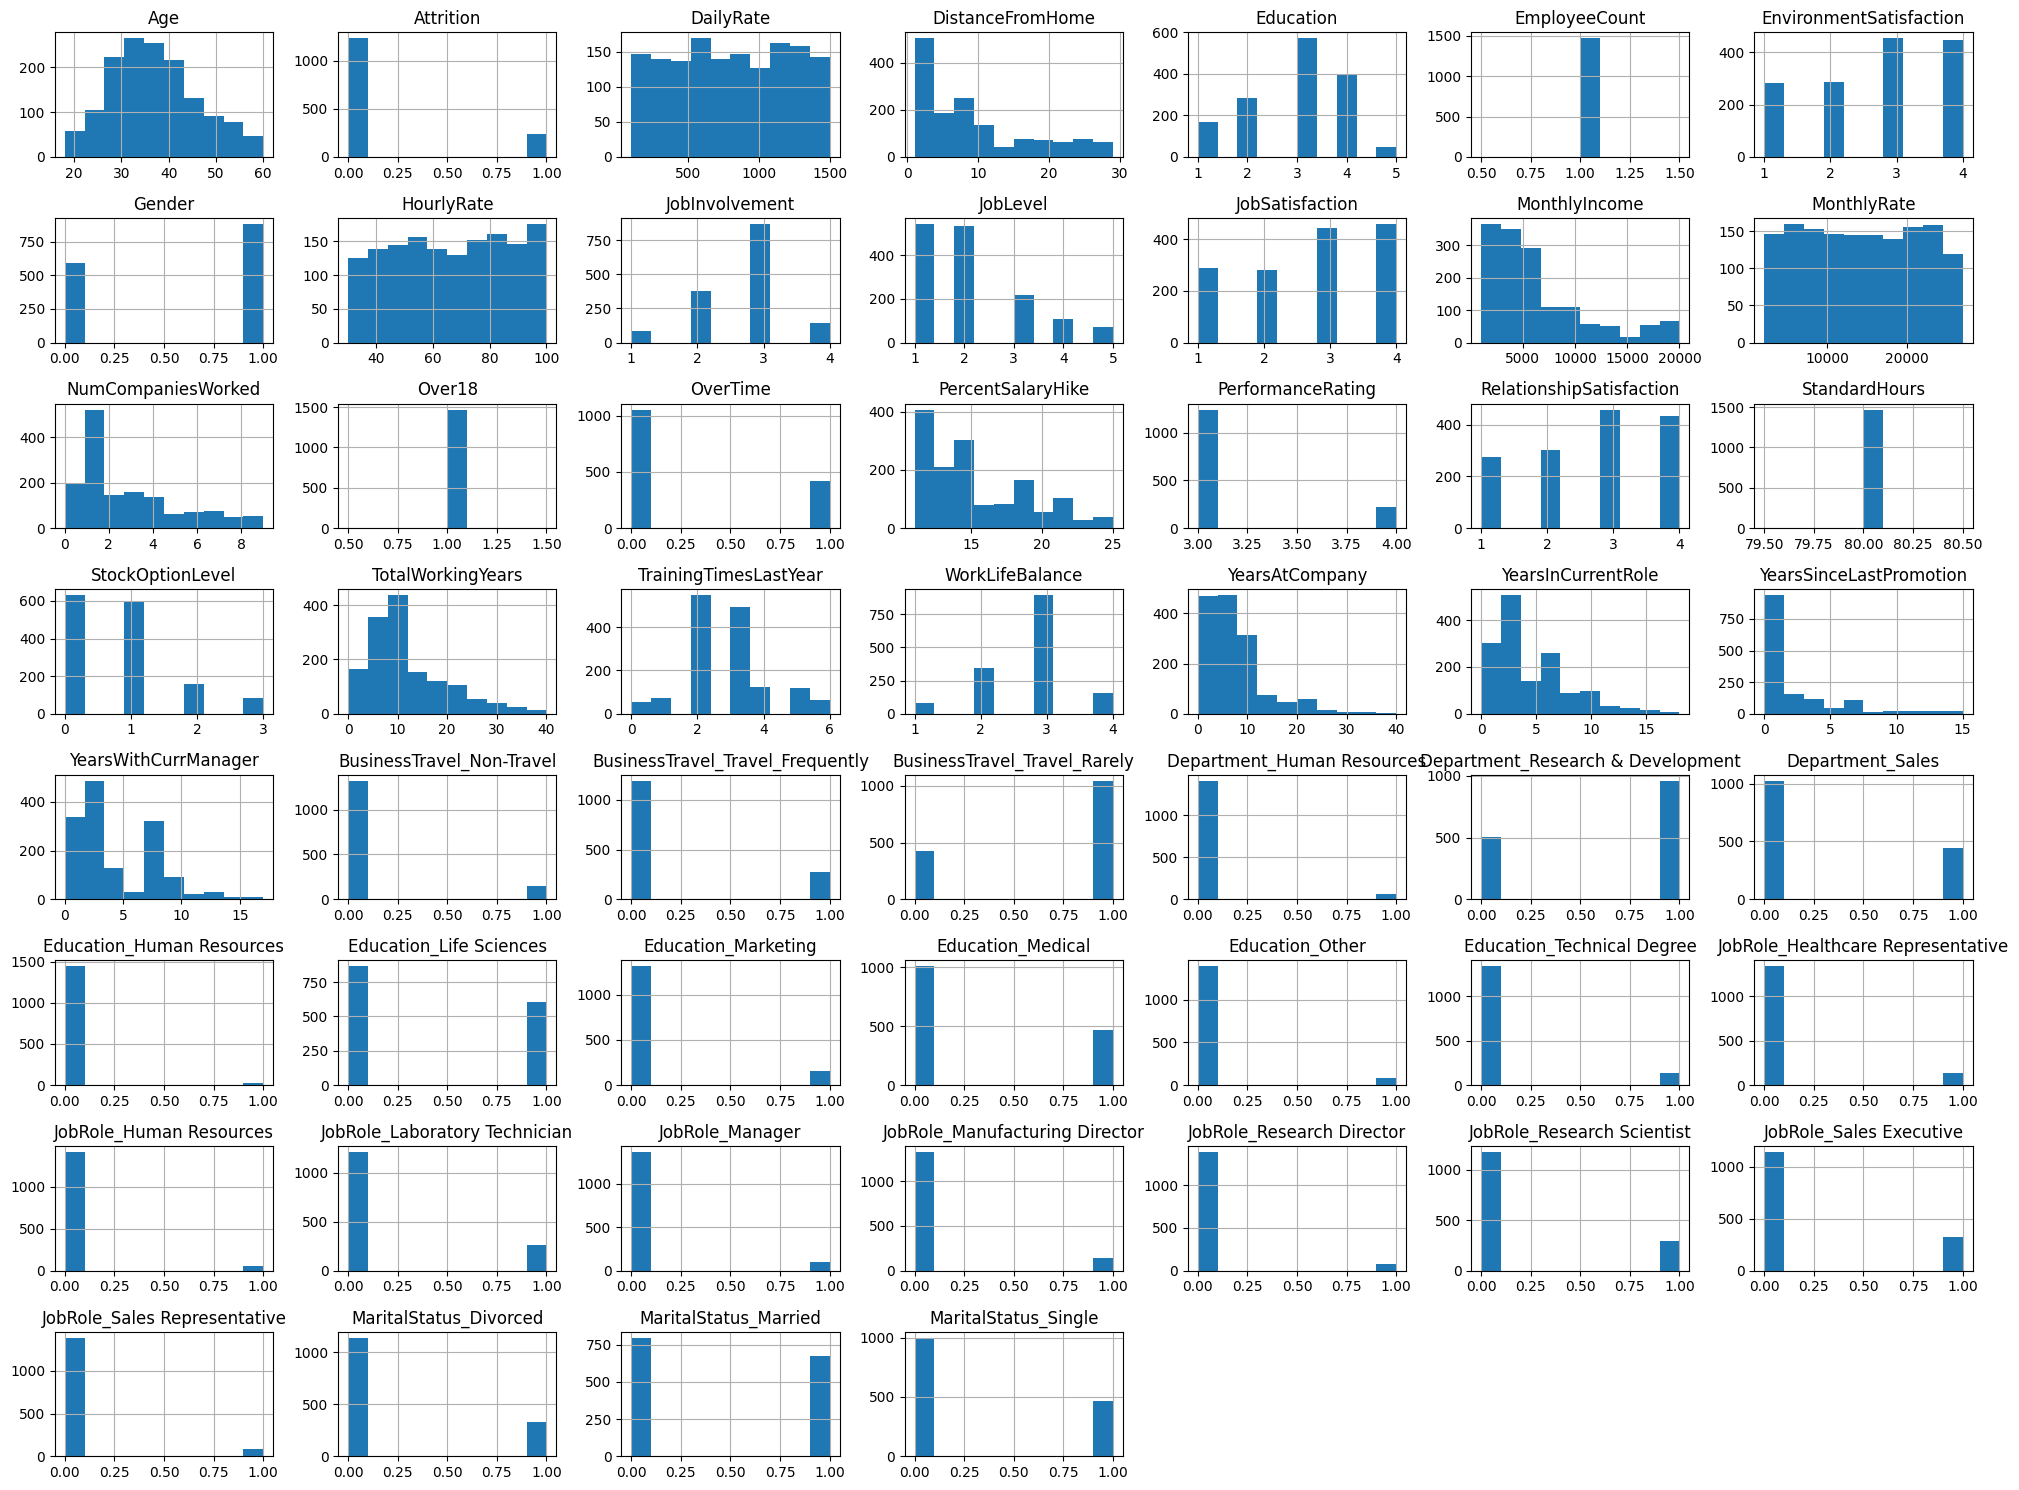

In [12]:
ds.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

there are multiple imbalanced categorical features (skewed)

with that said employee count wont matter as their is always one value to it, same with standardhours, over18,

In [13]:
ds = ds.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

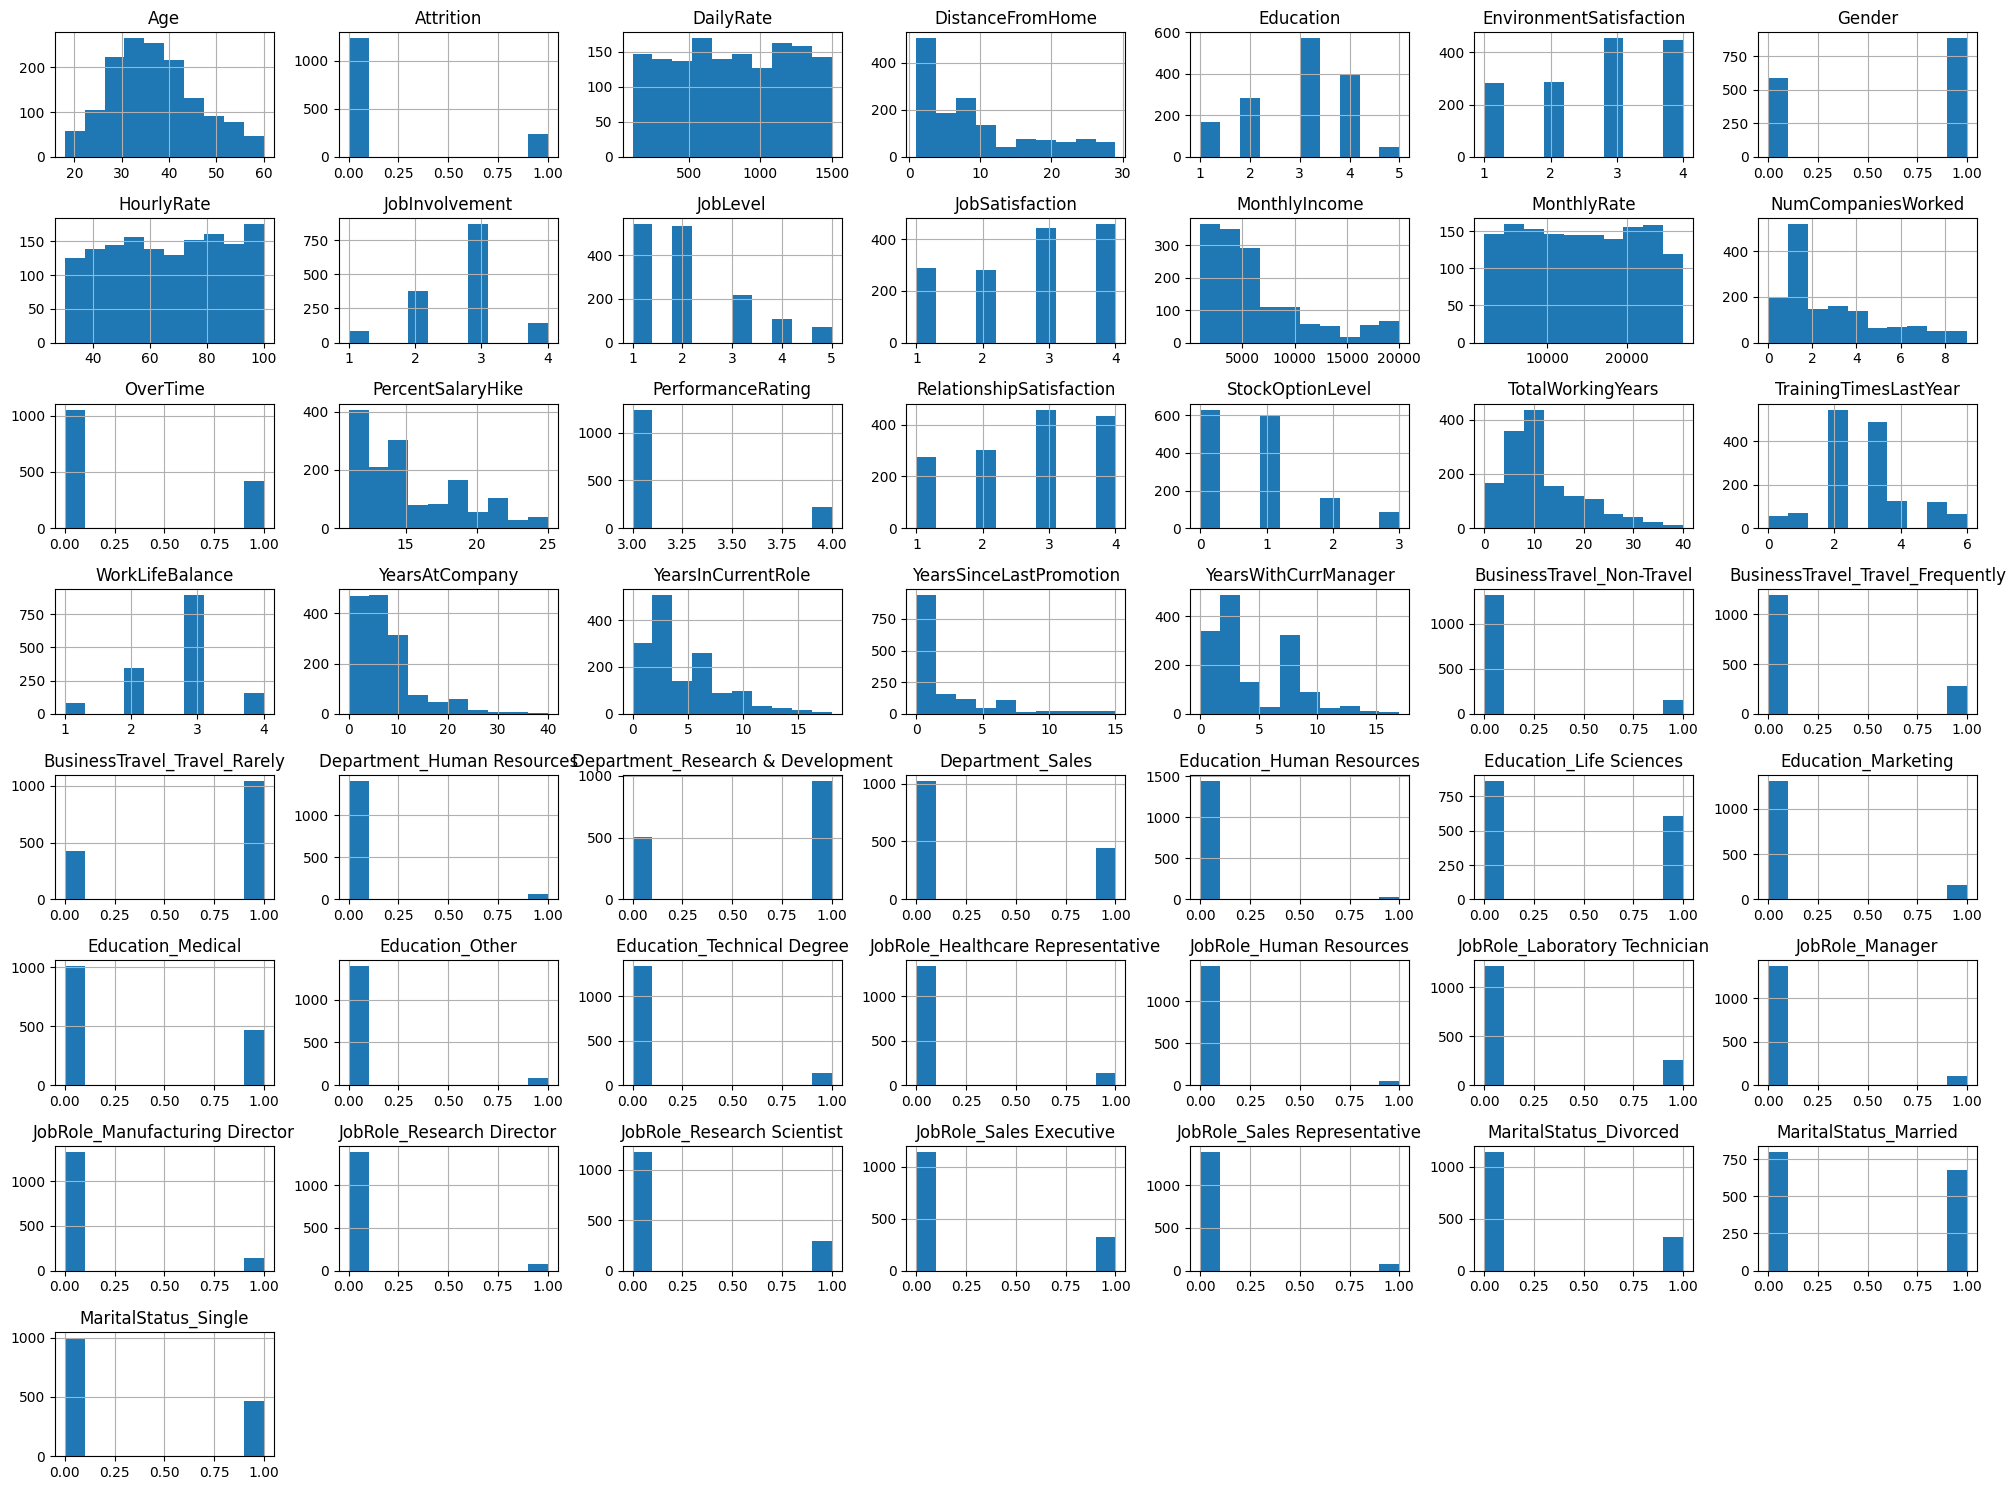

In [14]:
ds.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [110]:
x, y = ds.drop(['Attrition'], axis=1), ds['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
rf_model = RandomForestClassifier(n_jobs = -1)
rf_model.fit(x_train_scaled, y_train)
rf_y_pred = rf_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
 [[254   1]
 [ 35   4]]
ROC AUC Score: 0.7576671694318753


In [116]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_y_pred = lr_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, lr_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.59      0.44      0.50        39

    accuracy                           0.88       294
   macro avg       0.75      0.69      0.72       294
weighted avg       0.87      0.88      0.88       294

Confusion Matrix:
 [[243  12]
 [ 22  17]]
ROC AUC Score: 0.7576671694318753


In [117]:
xg_model = XGBClassifier()
xg_model.fit(x_train_scaled, y_train)
xg_y_pred = xg_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, xg_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xg_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.55      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.72      0.62      0.65       294
weighted avg       0.85      0.87      0.86       294

Confusion Matrix:
 [[246   9]
 [ 28  11]]
ROC AUC Score: 0.7576671694318753


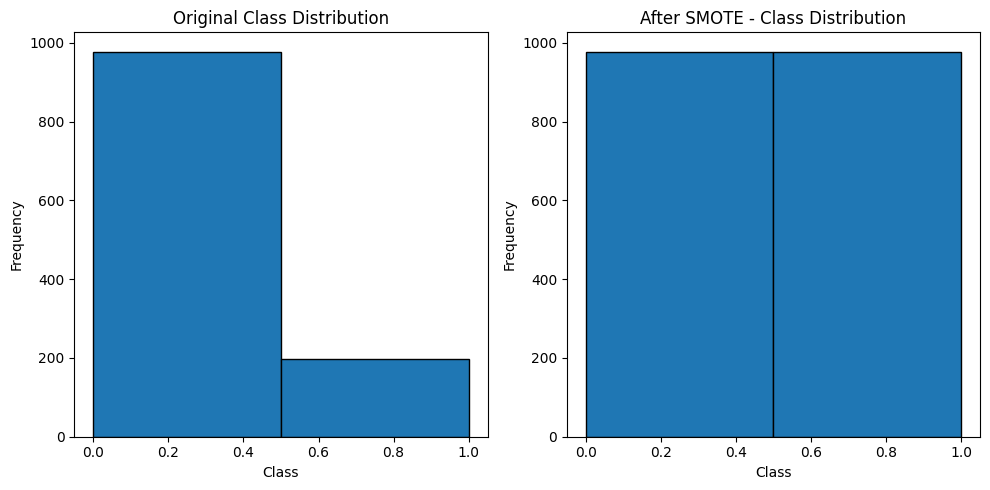

After SMOTE - Training set shape: (1956, 49)
After SMOTE - Class distribution: [978 978]


In [119]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.hist(y_train, bins=np.unique(y_train).size, edgecolor='black')
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Plot resampled class distribution
plt.subplot(1, 2, 2)
plt.hist(y_train_smote, bins=np.unique(y_train_smote).size, edgecolor='black')
plt.title("After SMOTE - Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
print(f"After SMOTE - Training set shape: {x_train_smote.shape}")
print(f"After SMOTE - Class distribution: {np.bincount(y_train_smote)}")

In [121]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(x_train_balanced, y_train_balanced)
y_pred = logistic_model.predict(x_test_scaled)
logistic_score=accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
logistic_score

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       255
           1       0.28      0.56      0.38        39

    accuracy                           0.75       294
   macro avg       0.60      0.67      0.61       294
weighted avg       0.84      0.75      0.78       294

Confusion Matrix:
 [[199  56]
 [ 17  22]]
ROC AUC Score: 0.7576671694318753


0.7517006802721088

In [133]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_balanced, y_train_balanced)
random_forest_pred = random_forest_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, random_forest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_accuracy

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.71      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.81      0.62      0.66       294
weighted avg       0.87      0.89      0.86       294

Confusion Matrix:
 [[251   4]
 [ 29  10]]
ROC AUC Score: 0.7576671694318753


0.8877551020408163

In [132]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train_balanced, y_train_balanced)
xgboost_pred = xgb_model.predict(x_test_scaled)
print("Classification Report:\n", classification_report(y_test, xgboost_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgboost_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
xgboost_accuracy

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.60      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.86      0.88      0.86       294

Confusion Matrix:
 [[247   8]
 [ 27  12]]
ROC AUC Score: 0.7576671694318753


0.8809523809523809

In [142]:
# Get feature names (after dropping target)
random_forest_feature_names_in_ = x.columns

# Get and sort feature importances
sorted_importance = dict(
    sorted(
        zip(random_forest_feature_names_in_, random_forest_model.feature_importances_),
        key=lambda item: item[1],
        reverse=True
    )
)

# Print top 10 important features
for feature, importance in list(sorted_importance.items())[:10]:
    print(f"{feature}: {importance:.4f}")


OverTime: 0.1416
StockOptionLevel: 0.0669
MaritalStatus_Single: 0.0435
JobLevel: 0.0414
MonthlyIncome: 0.0372
JobSatisfaction: 0.0370
Age: 0.0353
YearsWithCurrManager: 0.0349
TotalWorkingYears: 0.0323
YearsInCurrentRole: 0.0312


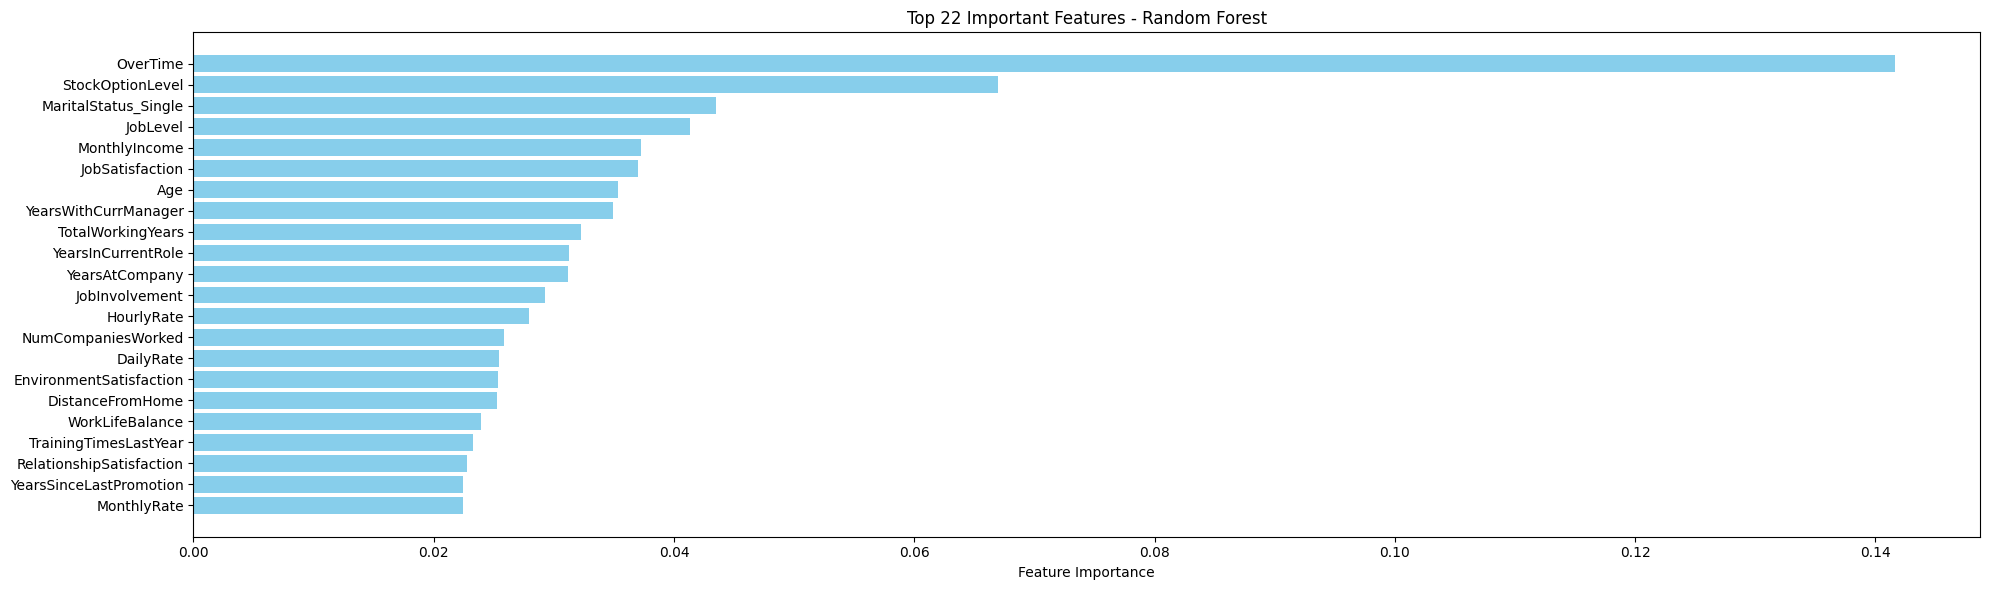

In [148]:
top_n = 22
top_features = list(sorted_importance.keys())[:top_n]
top_importances = list(sorted_importance.values())[:top_n]

plt.figure(figsize=(20, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 22 Important Features - Random Forest')
plt.tight_layout()
plt.show()

In [155]:
example_employee = pd.DataFrame([{
    'Age': 42,
    'DistanceFromHome': 15,
    'Education': 4,
    'EnvironmentSatisfaction': 2,
    'JobInvolvement': 2,
    'JobLevel': 3,
    'JobSatisfaction': 3,
    'MonthlyIncome': 10000,
    'NumCompaniesWorked': 4,
    'PercentSalaryHike': 12,
    'PerformanceRating': 4,
    'RelationshipSatisfaction': 4,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 18,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 8,
    'YearsInCurrentRole': 6,
    'YearsSinceLastPromotion': 3,
    'YearsWithCurrManager': 3,
    'DailyRate': 1200,
    'Gender': 1,
    'HourlyRate': 75,
    'MonthlyRate': 25000,
    'OverTime': 1,
    'BusinessTravel_Non-Travel': 1,
    'BusinessTravel_Travel_Frequently': 0,
    'BusinessTravel_Travel_Rarely': 0,
    'Department_Human Resources': 0,
    'Department_Research & Development': 1,
    'Department_Sales': 0,
    'Education_Human Resources': 0,
    'Education_Life Sciences': 1,
    'Education_Marketing': 0,
    'Education_Medical': 0,
    'Education_Other': 0,
    'Education_Technical Degree': 0,
    'JobRole_Healthcare Representative': 0,
    'JobRole_Human Resources': 0,
    'JobRole_Laboratory Technician': 0,
    'JobRole_Manager': 0,
    'JobRole_Manufacturing Director': 0,
    'JobRole_Research Director': 1,
    'JobRole_Research Scientist': 0,
    'JobRole_Sales Executive': 0,
    'JobRole_Sales Representative': 0,
    'MaritalStatus_Divorced': 0,
    'MaritalStatus_Married': 1,
    'MaritalStatus_Single': 0
}])

example_employee = example_employee[x.columns]
example_scaled = scaler.transform(example_employee)

# Predict
predicted_class = random_forest_model.predict(example_scaled)[0]
predicted_proba = random_forest_model.predict_proba(example_scaled)[0][1]

# Output
print(f"Predicted Attrition: {'Yes' if predicted_class == 1 else 'No'}")
print(f"Probability of Attrition: {predicted_proba:.2%}")

Predicted Attrition: No
Probability of Attrition: 37.00%
